### 🎯 EDA Objectives – Key Business Questions to Answer

This project focuses on analyzing player behavior and performance using a fictional gaming dataset. The goal is to derive meaningful insights that can help in product strategy, marketing, and player retention efforts.

We will explore the following key business questions:

1. 📊 **What is the average daily playtime per platform?**  
   → Helps identify which platforms (e.g., PC, PS5, X Box) have the most engaged users.

2. 🎮 **Which game genre keeps players engaged the longest (based on average playtime)?**  
   → Useful for future game development focus and content strategy.

3. 💰 **Do premium members spend more in in-game purchases than free users?**  
   → Assists in evaluating the value of premium membership.

4. 🕐 **What are the most active gaming hours across users (based on session start time)?**  
   → Helps optimize server loads, marketing campaigns, and live events.

5. 🌍 **Which Indian studio region has the highest average gameplay time?**  
   → Useful to identify regional engagement patterns and server distribution needs.

6. 📉 **Is there a relationship between churned players and support tickets raised?**  
   → Helps understand if poor support experience leads to player churn.

7. 🔁 **Which game titles have the highest retention (based on last login activity)?**  
   → Allows studios to focus on long-term engaging games and retention strategies.

These questions aim to simulate real-world data analyst tasks in the gaming industry.


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)

In [2]:
data = pd.read_csv("Gaming_Company_Data_Uncleaned.csv")
df1 = pd.DataFrame(data)
df = df1.copy()
df.head()

,Player_ID,Age,Country,Studio_Region,Game_Title,Genre,Game_Mode,Platform,Device_Type,Sales_Channel,Game_Release_Year,Join_Date,Last_Login,Session_Start_Time,Session_End_Time,Daily_Playtime (mins),In_Game_Purchases ($),Units_Sold,Revenue_Generated ($),Membership_Tier,Favorite_Mode,Support_Tickets_Raised,Refund_Requested,Marketing_Source,Churned
0,P1000,20.0,India,Kolkata,FIFA 24,Battle Royale,Battle Royale,PC,Switch,Steam,2019,2023-09-25,2023-10-27,08:05:00,09:15:00,70,46.53,5,232.65,Free,Solo,2,No,In-Game Promo,Yes
1,P1001,39.0,USA,Delhi,PUBG,NaN,Zombies,PC,Switch,Company Website,2023,2022-02-12,2022-12-27,14:48:00,16:29:00,101,20.44,4,81.76,Free,Team,1,No,Ads,Yes
2,P1002,42.0,Brazil,Bangalore,Apex Legends,FPS,Ranked,Console,Switch,App Store,2021,2019-10-12,2020-04-16,15:49:00,17:18:00,89,197.04,2,394.08,VIP,Team,0,No,YouTube,Yes
3,P1003,23.0,UK,Pune,Fortnite,Strategy,Solo,Mobile,Switch,Steam,2020,2021-09-29,2022-08-29,22:24:00,23:48:00,84,197.9,5,989.50,Free,Team,2,No,Ads,Yes
4,P1004,27.0,India,Pune,Apex Legends,Sports,Zombies,PC,Android Tablet,App Store,2021,2024-08-06,2025-02-24,22:09:00,23:31:00,82,27.93,5,139.65,Premium,NaN,1,No,In-Game Promo,Yes


In [3]:
df.head(2)

,Player_ID,Age,Country,Studio_Region,Game_Title,Genre,Game_Mode,Platform,Device_Type,Sales_Channel,Game_Release_Year,Join_Date,Last_Login,Session_Start_Time,Session_End_Time,Daily_Playtime (mins),In_Game_Purchases ($),Units_Sold,Revenue_Generated ($),Membership_Tier,Favorite_Mode,Support_Tickets_Raised,Refund_Requested,Marketing_Source,Churned
0,P1000,20.0,India,Kolkata,FIFA 24,Battle Royale,Battle Royale,PC,Switch,Steam,2019,2023-09-25,2023-10-27,08:05:00,09:15:00,70,46.53,5,232.65,Free,Solo,2,No,In-Game Promo,Yes
1,P1001,39.0,USA,Delhi,PUBG,NaN,Zombies,PC,Switch,Company Website,2023,2022-02-12,2022-12-27,14:48:00,16:29:00,101,20.44,4,81.76,Free,Team,1,No,Ads,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player_ID               6000 non-null   object 
 1   Age                     5400 non-null   float64
 2   Country                 5400 non-null   object 
 3   Studio_Region           6000 non-null   object 
 4   Game_Title              6000 non-null   object 
 5   Genre                   5400 non-null   object 
 6   Game_Mode               6000 non-null   object 
 7   Platform                6000 non-null   object 
 8   Device_Type             5400 non-null   object 
 9   Sales_Channel           6000 non-null   object 
 10  Game_Release_Year       6000 non-null   int64  
 11  Join_Date               6000 non-null   object 
 12  Last_Login              6000 non-null   object 
 13  Session_Start_Time      6000 non-null   object 
 14  Session_End_Time        6000 non-null   

In [5]:
df.describe()

,Age,Game_Release_Year,Daily_Playtime (mins),Units_Sold,Revenue_Generated ($),Support_Tickets_Raised
count,5400.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,28.978148,2021.510500,-42.156167,3.026833,301.530455,0.976333
std,9.629489,2.277591,420.106021,1.413074,240.699706,1.222984
min,13.000000,2018.000000,-1425.000000,1.000000,0.000000,0.000000
25%,20.000000,2020.000000,40.000000,2.000000,109.697500,0.000000
50%,29.000000,2022.000000,83.000000,3.000000,230.690000,0.000000
75%,38.000000,2023.000000,132.000000,4.000000,448.490000,2.000000
max,45.000000,2025.000000,180.000000,5.000000,999.200000,4.000000


# Data Cleaning

In [6]:
# Extracting the year from Game_Release_Year 
df['Game_Release_Year'] = df['Game_Release_Year'].astype(str).str.extract(r'(\d{4})')[0].astype('category')

In [7]:
#Converting object type columns to category for best usecase
object_type_columns = df.select_dtypes(include='object').columns.tolist()
for col in object_type_columns:
  df[col] = df[col].astype('category')


In [8]:
# Changing date columns type to datetime
date_columns = df[['Join_Date','Last_Login']]
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

# Adjusting the Age column:-
df['Age'] = df['Age'].interpolate() # filling the null values
df['Age'] = df['Age'].astype('int')

# adjusting time columns:-
time_columns = df[['Session_Start_Time','Session_End_Time']]
for col in time_columns:
    df[col] = pd.to_datetime(df[col],format = '%H:%M:%S').dt.time

# adjusting null contains column:-
null_col = df[['Country','Genre','Device_Type','Favorite_Mode']]
for col in null_col:
    df[col] = df[col].fillna(method = 'ffill')


df['In_Game_Purchases ($)'] = df["In_Game_Purchases ($)"].astype('object')
df['In_Game_Purchases ($)'] = pd.to_numeric(df['In_Game_Purchases ($)'], errors='coerce')
df['In_Game_Purchases ($)'] = df['In_Game_Purchases ($)'].fillna(0)

C:\Users\nikuj\AppData\Local\Temp\ipykernel_4624\3913846303.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method = 'ffill')


In [9]:
df.head(2)

,Player_ID,Age,Country,Studio_Region,Game_Title,Genre,Game_Mode,Platform,Device_Type,Sales_Channel,Game_Release_Year,Join_Date,Last_Login,Session_Start_Time,Session_End_Time,Daily_Playtime (mins),In_Game_Purchases ($),Units_Sold,Revenue_Generated ($),Membership_Tier,Favorite_Mode,Support_Tickets_Raised,Refund_Requested,Marketing_Source,Churned
0,P1000,20,India,Kolkata,FIFA 24,Battle Royale,Battle Royale,PC,Switch,Steam,2019,2023-09-25,2023-10-27,08:05:00,09:15:00,70,46.53,5,232.65,Free,Solo,2,No,In-Game Promo,Yes
1,P1001,39,USA,Delhi,PUBG,Battle Royale,Zombies,PC,Switch,Company Website,2023,2022-02-12,2022-12-27,14:48:00,16:29:00,101,20.44,4,81.76,Free,Team,1,No,Ads,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Player_ID               6000 non-null   category      
 1   Age                     6000 non-null   int64         
 2   Country                 6000 non-null   category      
 3   Studio_Region           6000 non-null   category      
 4   Game_Title              6000 non-null   category      
 5   Genre                   6000 non-null   category      
 6   Game_Mode               6000 non-null   category      
 7   Platform                6000 non-null   category      
 8   Device_Type             6000 non-null   category      
 9   Sales_Channel           6000 non-null   category      
 10  Game_Release_Year       6000 non-null   category      
 11  Join_Date               6000 non-null   datetime64[ns]
 12  Last_Login              6000 non-null   datetime

In [11]:
df["In_Game_Purchases ($)"].value_counts()

In_Game_Purchases ($)
0.00      871
193.29      4
72.20       4
134.82      4
16.49       4
         ... 
116.99      1
25.20       1
127.79      1
177.68      1
49.96       1
Name: count, Length: 4540, dtype: int64

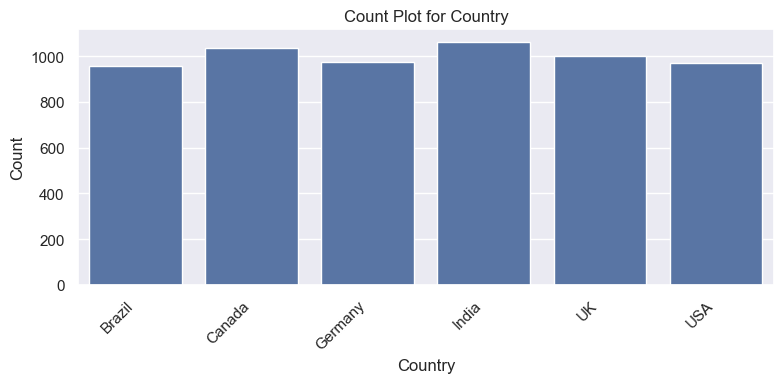

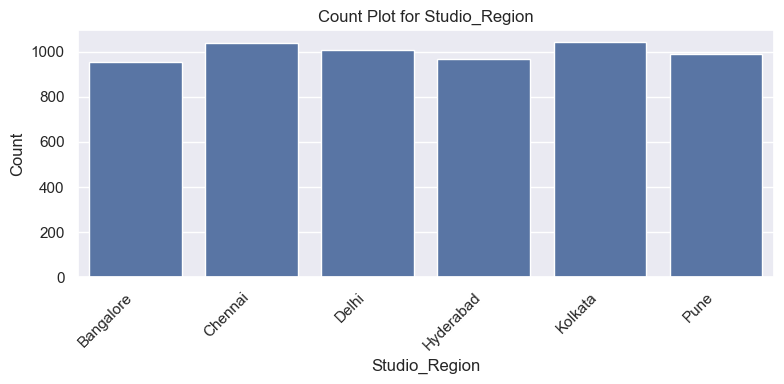

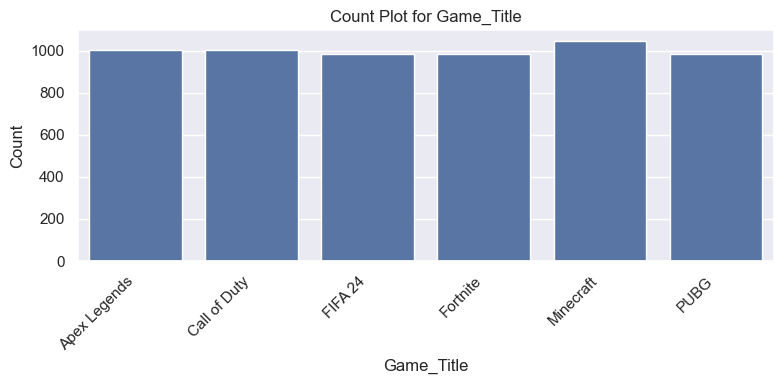

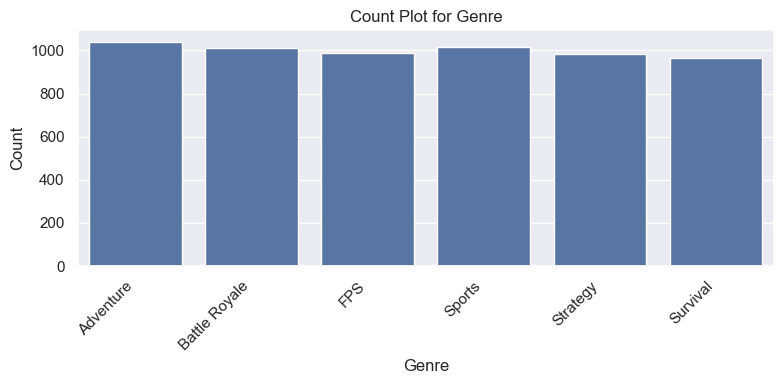

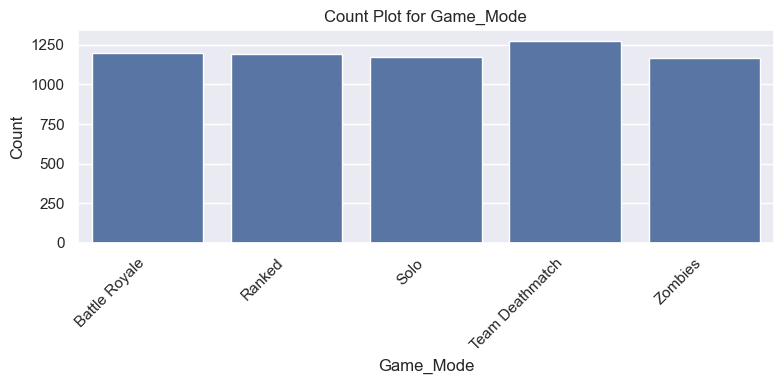

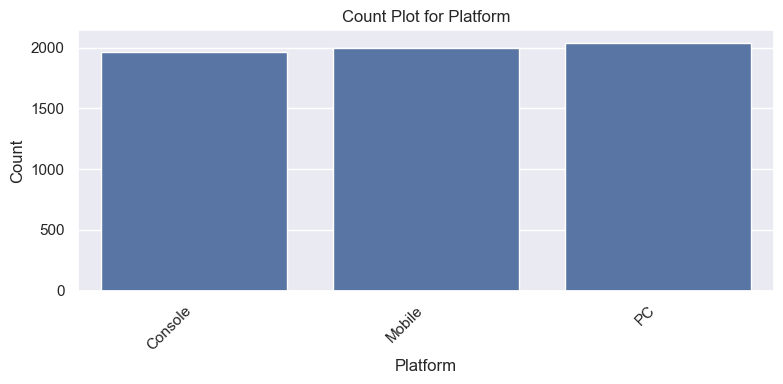

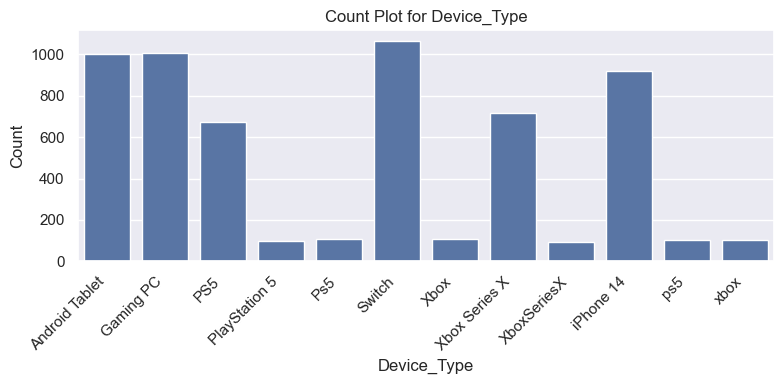

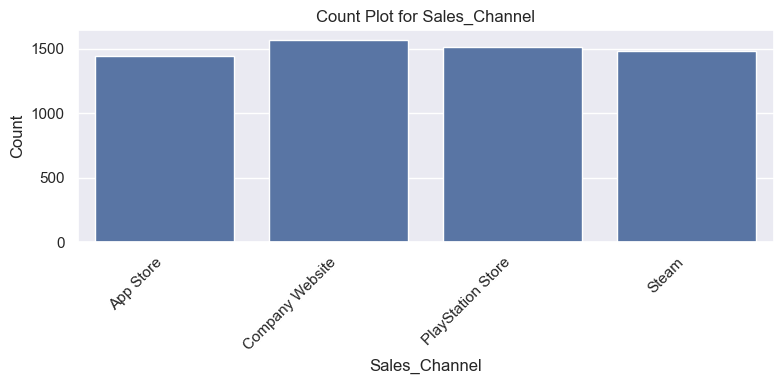

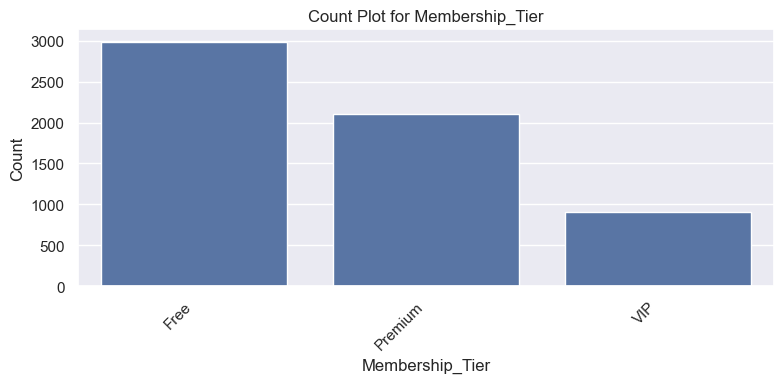

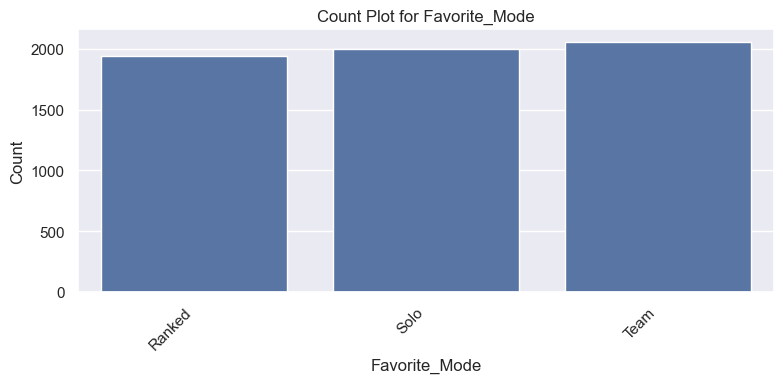

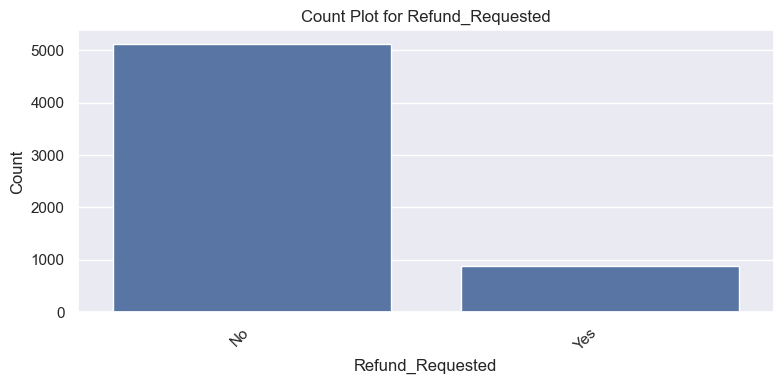

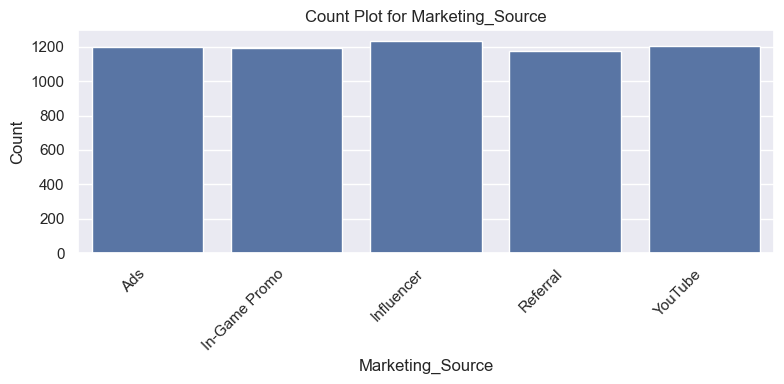

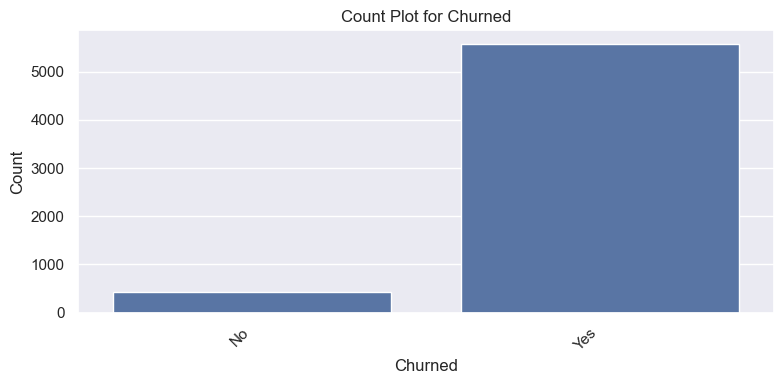

In [12]:
# Checking for any mistyped or inconsistent values in the column??

category_columns = ['Country', 'Studio_Region', 'Game_Title',
    'Genre', 'Game_Mode', 'Platform', 'Device_Type',
    'Sales_Channel', 'Membership_Tier', 'Favorite_Mode', 'Refund_Requested',
    'Marketing_Source', 'Churned'
]
for col in category_columns:
    plt.figure(figsize = (8,4))
    sns.set_theme(style = 'darkgrid')
    sns.countplot(data = df,x = col)
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Here we find out that in Device Type column some values are mistyped lets fixed it 

In [13]:
df["Device_Type"].value_counts()

Device_Type
Switch            1063
Gaming PC         1008
Android Tablet    1002
iPhone 14          921
Xbox Series X      719
PS5                675
Xbox               108
Ps5                106
ps5                104
xbox               103
PlayStation 5       99
XboxSeriesX         92
Name: count, dtype: int64

In [14]:
# 🎮 Device_Type column cleanup:
# Found mistyped values in 'Device_Type' column:
# - PS5 appears as: 'Ps5', 'ps5', 'Play Station 5', 'PS5' → Convert all to 'PS5'
# - 'xbox' and 'Xbox' → Merge into 'X Box'
# - 'XboxSeriesX' and 'Xbox Series X' → Merge into 'Xbox Series X'

# We’re going to standardize all these entries for accurate device analysis.

df["Device_Type"] = df["Device_Type"].replace({"Ps5":"PS5","ps5":"PS5","Ps5":"PS5","PlayStation 5":"Ps5",
                                               "xbox":"Xbox","XboxSeriesX":"Xbox Series X"})

C:\Users\nikuj\AppData\Local\Temp\ipykernel_4624\1482553904.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Device_Type"] = df["Device_Type"].replace({"Ps5":"PS5","ps5":"PS5","Ps5":"PS5","PlayStation 5":"Ps5",


In [15]:
df.describe()

,Age,Join_Date,Last_Login,Daily_Playtime (mins),In_Game_Purchases ($),Units_Sold,Revenue_Generated ($),Support_Tickets_Raised
count,6000.000000,6000,6000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,28.949000,2022-01-04 04:00:28.800000,2023-09-28 10:57:50.400000,-42.156167,84.880017,3.026833,301.530455,0.976333
min,13.000000,2019-01-01 00:00:00,2019-02-12 00:00:00,-1425.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,2020-07-22 18:00:00,2022-11-16 18:00:00,40.000000,23.577500,2.000000,109.697500,0.000000
50%,29.000000,2022-01-13 00:00:00,2024-02-11 00:00:00,83.000000,82.500000,3.000000,230.690000,0.000000
75%,37.000000,2023-06-24 06:00:00,2024-11-23 00:00:00,132.000000,140.160000,4.000000,448.490000,2.000000
max,45.000000,2024-12-01 00:00:00,2025-06-30 00:00:00,180.000000,200.000000,5.000000,999.200000,4.000000
std,9.401727,NaN,NaN,420.106021,63.793003,1.413074,240.699706,1.222984


In [16]:
df.head()

,Player_ID,Age,Country,Studio_Region,Game_Title,Genre,Game_Mode,Platform,Device_Type,Sales_Channel,Game_Release_Year,Join_Date,Last_Login,Session_Start_Time,Session_End_Time,Daily_Playtime (mins),In_Game_Purchases ($),Units_Sold,Revenue_Generated ($),Membership_Tier,Favorite_Mode,Support_Tickets_Raised,Refund_Requested,Marketing_Source,Churned
0,P1000,20,India,Kolkata,FIFA 24,Battle Royale,Battle Royale,PC,Switch,Steam,2019,2023-09-25,2023-10-27,08:05:00,09:15:00,70,46.53,5,232.65,Free,Solo,2,No,In-Game Promo,Yes
1,P1001,39,USA,Delhi,PUBG,Battle Royale,Zombies,PC,Switch,Company Website,2023,2022-02-12,2022-12-27,14:48:00,16:29:00,101,20.44,4,81.76,Free,Team,1,No,Ads,Yes
2,P1002,42,Brazil,Bangalore,Apex Legends,FPS,Ranked,Console,Switch,App Store,2021,2019-10-12,2020-04-16,15:49:00,17:18:00,89,197.04,2,394.08,VIP,Team,0,No,YouTube,Yes
3,P1003,23,UK,Pune,Fortnite,Strategy,Solo,Mobile,Switch,Steam,2020,2021-09-29,2022-08-29,22:24:00,23:48:00,84,197.90,5,989.50,Free,Team,2,No,Ads,Yes
4,P1004,27,India,Pune,Apex Legends,Sports,Zombies,PC,Android Tablet,App Store,2021,2024-08-06,2025-02-24,22:09:00,23:31:00,82,27.93,5,139.65,Premium,Team,1,No,In-Game Promo,Yes


<Axes: xlabel='Daily_Playtime (mins)'>

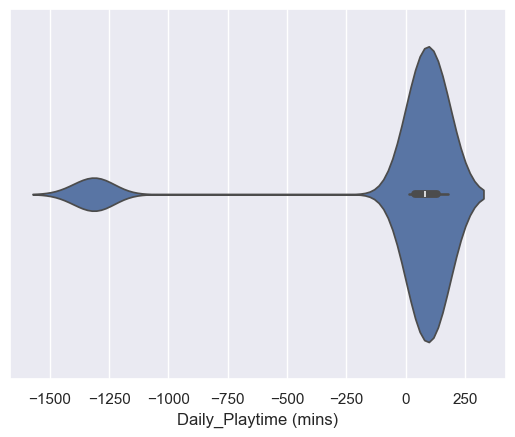

In [17]:
# The column Playtime contains -ve value lets examine it by violin plot
sns.violinplot(data = df,x = "Daily_Playtime (mins)")

#The violin graph contains a lot of -ve value this is beacuse player who play games at midnight like 11pm to 1 am are subtracted in wrong way thats why a lot of -ve value in the playtime column

In [18]:
df.head(2)

,Player_ID,Age,Country,Studio_Region,Game_Title,Genre,Game_Mode,Platform,Device_Type,Sales_Channel,Game_Release_Year,Join_Date,Last_Login,Session_Start_Time,Session_End_Time,Daily_Playtime (mins),In_Game_Purchases ($),Units_Sold,Revenue_Generated ($),Membership_Tier,Favorite_Mode,Support_Tickets_Raised,Refund_Requested,Marketing_Source,Churned
0,P1000,20,India,Kolkata,FIFA 24,Battle Royale,Battle Royale,PC,Switch,Steam,2019,2023-09-25,2023-10-27,08:05:00,09:15:00,70,46.53,5,232.65,Free,Solo,2,No,In-Game Promo,Yes
1,P1001,39,USA,Delhi,PUBG,Battle Royale,Zombies,PC,Switch,Company Website,2023,2022-02-12,2022-12-27,14:48:00,16:29:00,101,20.44,4,81.76,Free,Team,1,No,Ads,Yes


In [19]:
# Correcting the values in Daily_Playtime (mins) column 
df["Daily_Playtime (mins)"] = ((df["Session_End_Time"].astype(str).apply(pd.to_timedelta)-
                              df["Session_Start_Time"].astype(str).apply(pd.to_timedelta)).dt.total_seconds()/60
                              ).apply(lambda x: x if x >= 0 else x + 1440)

<Axes: xlabel='Daily_Playtime (mins)'>

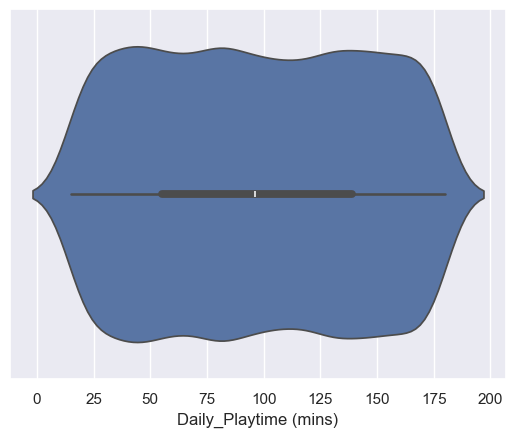

In [20]:
# Now observing the violin plot after cleaning it 
sns.violinplot(data = df,x = "Daily_Playtime (mins)")

In [21]:
# dropping the extra columns from the dataset
df.drop(columns = ["Units_Sold","Revenue_Generated ($)"],inplace = True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Player_ID               6000 non-null   category      
 1   Age                     6000 non-null   int64         
 2   Country                 6000 non-null   category      
 3   Studio_Region           6000 non-null   category      
 4   Game_Title              6000 non-null   category      
 5   Genre                   6000 non-null   category      
 6   Game_Mode               6000 non-null   category      
 7   Platform                6000 non-null   category      
 8   Device_Type             6000 non-null   category      
 9   Sales_Channel           6000 non-null   category      
 10  Game_Release_Year       6000 non-null   category      
 11  Join_Date               6000 non-null   datetime64[ns]
 12  Last_Login              6000 non-null   datetime

### 📄 Dataset Description – Gaming Behavior Analysis

This dataset contains information about 6,000 players collected from a fictional gaming company operating in India. The data reflects player engagement, purchases, behavior, and platform preferences across multiple game titles and regions. It is structured to simulate real-world gaming analytics with columns suitable for player segmentation, churn analysis, and gameplay behavior insights.

---

#### 🔢 Column Overview

| Column Name                | Description |
|---------------------------|-------------|
| `Player_ID`               | Unique identifier for each player |
| `Age`                     | Age of the player |
| `Country`                 | Country of the player (only India in this dataset) |
| `Studio_Region`           | City/region of the studio that developed the game |
| `Game_Title`              | Name of the game played |
| `Genre`                   | Genre of the game (e.g., FPS, RPG, Battle Royale) |
| `Game_Mode`               | Type of gameplay mode (e.g., Solo, Co-op, Multiplayer) |
| `Platform`                | Platform used by player (e.g., PC, PS5, X Box) |
| `Device_Type`             | Device used (e.g., Console, Mobile, PC) |
| `Sales_Channel`           | Channel where the game was sold (e.g., Steam, Epic, Retail) |
| `Game_Release_Year`       | Release year of the game |
| `Join_Date`               | Date when the player registered/joined |
| `Last_Login`              | Most recent login date |
| `Session_Start_Time`      | Time when the player began a gameplay session |
| `Session_End_Time`        | Time when the session ended |
| `Daily_Playtime (mins)`   | Total minutes played on that day |
| `In_Game_Purchases ($)`   | Amount spent on in-game purchases |
| `Membership_Tier`         | Player membership tier (e.g., Free, Premium) |
| `Favorite_Mode`           | Most frequently played game mode |
| `Support_Tickets_Raised`  | Number of support tickets raised by player |
| `Refund_Requested`        | Whether a refund was requested (Yes/No) |
| `Marketing_Source`        | Source through which player was acquired (e.g., Social Media, In-Game Promo) |
| `Churned`                 | Whether the player has churned (Yes/No) |


# EDA

 Q1. 📊 **What is the average daily playtime per platform?**  

<Axes: xlabel='Daily_Playtime (mins)'>

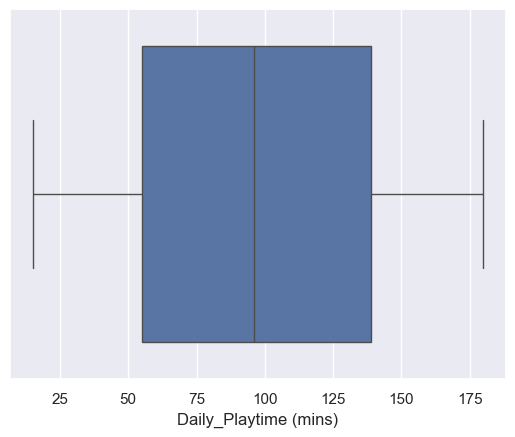

In [23]:
# First check out about outlier in playtime column 
sns.boxplot(data = df,x = "Daily_Playtime (mins)")

As there are no outliers in our playtime column let's  move to  next steps

In [24]:
df.head(2)

,Player_ID,Age,Country,Studio_Region,Game_Title,Genre,Game_Mode,Platform,Device_Type,Sales_Channel,Game_Release_Year,Join_Date,Last_Login,Session_Start_Time,Session_End_Time,Daily_Playtime (mins),In_Game_Purchases ($),Membership_Tier,Favorite_Mode,Support_Tickets_Raised,Refund_Requested,Marketing_Source,Churned
0,P1000,20,India,Kolkata,FIFA 24,Battle Royale,Battle Royale,PC,Switch,Steam,2019,2023-09-25,2023-10-27,08:05:00,09:15:00,70.0,46.53,Free,Solo,2,No,In-Game Promo,Yes
1,P1001,39,USA,Delhi,PUBG,Battle Royale,Zombies,PC,Switch,Company Website,2023,2022-02-12,2022-12-27,14:48:00,16:29:00,101.0,20.44,Free,Team,1,No,Ads,Yes


C:\Users\nikuj\AppData\Local\Temp\ipykernel_4624\1081053150.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_plytm_platform = df.groupby("Platform").agg({"Daily_Playtime (mins)":"mean"}).round(2).sort_values(by = "Daily_Playtime (mins)",ascending = False)


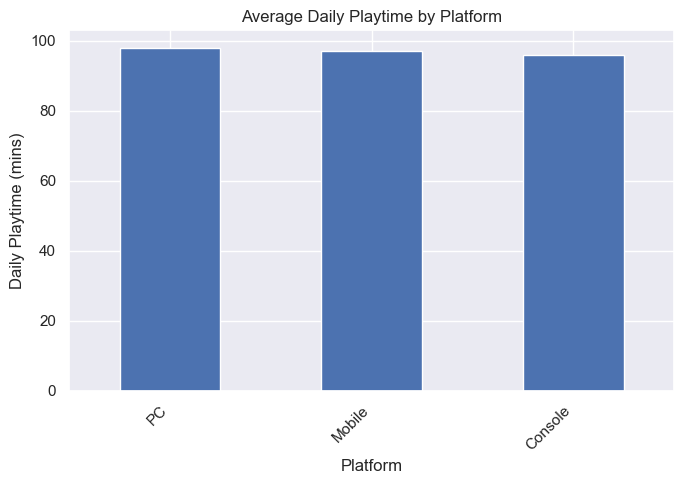

In [25]:
avg_plytm_platform = df.groupby("Platform").agg({"Daily_Playtime (mins)":"mean"}).round(2).sort_values(by = "Daily_Playtime (mins)",ascending = False)
avg_plytm_platform.plot(kind = "bar",figsize = (7,5),legend = False)
plt.title("Average Daily Playtime by Platform")
plt.xlabel("Platform")
plt.ylabel("Daily Playtime (mins)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

As we can see by graph, All platforms have mean around 90 minutes

Q2. 🎮 **Which game genre keeps players engaged the longest (based on average playtime)?** 

C:\Users\nikuj\AppData\Local\Temp\ipykernel_4624\397817898.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  a = df.pivot_table(index = "Platform",columns = "Genre",values = "Daily_Playtime (mins)").round(2)


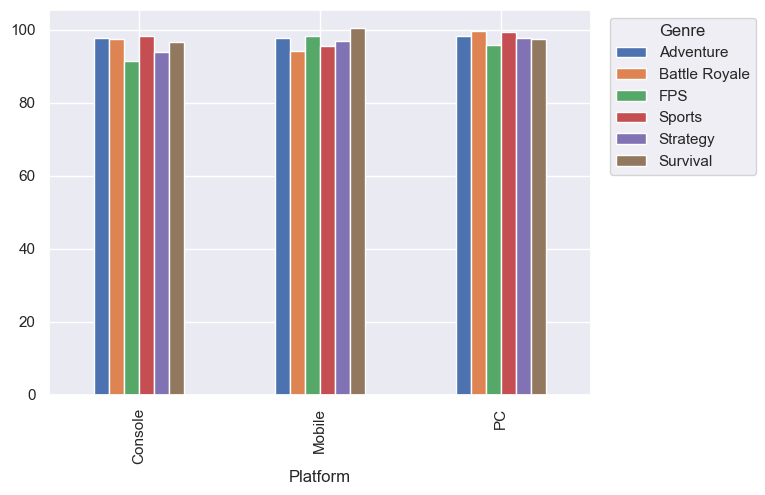

In [26]:
a = df.pivot_table(index = "Platform",columns = "Genre",values = "Daily_Playtime (mins)").round(2)
a.plot(kind = "bar",figsize = (7,5))
plt.legend(title="Genre", loc='upper left', bbox_to_anchor=(1.02, 1))

### 🎮 Genre vs Platform – Quick Insights

- **Survival on Mobile** shows highest playtime.
- **FPS** has lowest engagement across platforms.
- **Strategy** performs best on PC.
- **Adventure & Sports** are consistently strong across all platforms.

🧠 Focus survival games on mobile and strategy games on PC.


Q3. 💰 **Do premium members spend more in in-game purchases than free users?**  

In [27]:
df.head(5)

,Player_ID,Age,Country,Studio_Region,Game_Title,Genre,Game_Mode,Platform,Device_Type,Sales_Channel,Game_Release_Year,Join_Date,Last_Login,Session_Start_Time,Session_End_Time,Daily_Playtime (mins),In_Game_Purchases ($),Membership_Tier,Favorite_Mode,Support_Tickets_Raised,Refund_Requested,Marketing_Source,Churned
0,P1000,20,India,Kolkata,FIFA 24,Battle Royale,Battle Royale,PC,Switch,Steam,2019,2023-09-25,2023-10-27,08:05:00,09:15:00,70.0,46.53,Free,Solo,2,No,In-Game Promo,Yes
1,P1001,39,USA,Delhi,PUBG,Battle Royale,Zombies,PC,Switch,Company Website,2023,2022-02-12,2022-12-27,14:48:00,16:29:00,101.0,20.44,Free,Team,1,No,Ads,Yes
2,P1002,42,Brazil,Bangalore,Apex Legends,FPS,Ranked,Console,Switch,App Store,2021,2019-10-12,2020-04-16,15:49:00,17:18:00,89.0,197.04,VIP,Team,0,No,YouTube,Yes
3,P1003,23,UK,Pune,Fortnite,Strategy,Solo,Mobile,Switch,Steam,2020,2021-09-29,2022-08-29,22:24:00,23:48:00,84.0,197.90,Free,Team,2,No,Ads,Yes
4,P1004,27,India,Pune,Apex Legends,Sports,Zombies,PC,Android Tablet,App Store,2021,2024-08-06,2025-02-24,22:09:00,23:31:00,82.0,27.93,Premium,Team,1,No,In-Game Promo,Yes


C:\Users\nikuj\AppData\Local\Temp\ipykernel_4624\1539974393.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend_Tier = df.groupby("Membership_Tier").agg({"In_Game_Purchases ($)": "mean"}).round(2).plot(kind = "bar",legend = False)
C:\Users\nikuj\AppData\Local\Temp\ipykernel_4624\1539974393.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Total_spend_Tier = df.groupby("Membership_Tier").agg({"In_Game_Purchases ($)": "sum"}).round(2).plot(kind = "bar",legend = False)


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


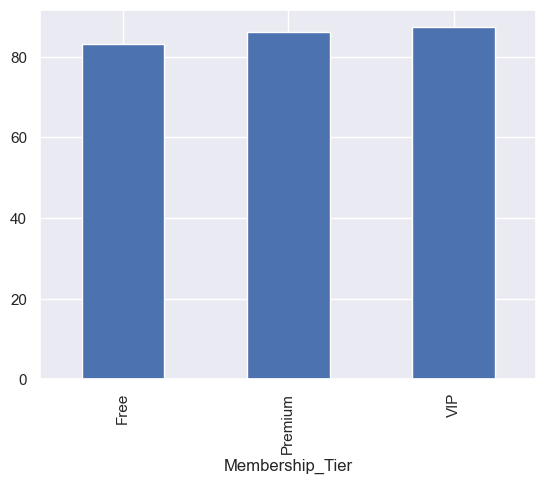

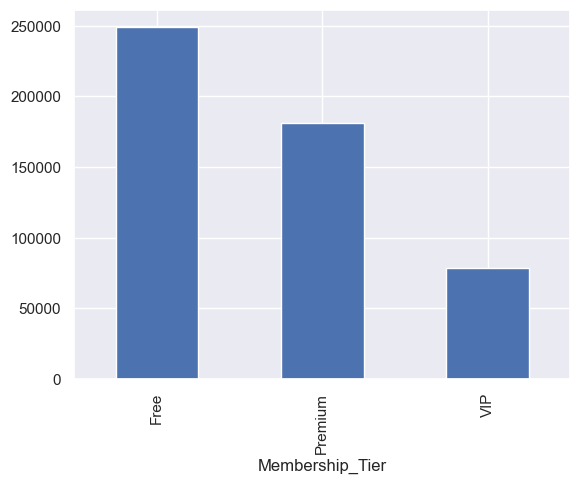

In [28]:
# Spend by Tier Avg VS Total
avg_spend_Tier = df.groupby("Membership_Tier").agg({"In_Game_Purchases ($)": "mean"}).round(2).plot(kind = "bar",legend = False)
Total_spend_Tier = df.groupby("Membership_Tier").agg({"In_Game_Purchases ($)": "sum"}).round(2).plot(kind = "bar",legend = False)
print(avg_spend_Tier)
print(Total_spend_Tier)

In [29]:
df["Membership_Tier"].value_counts()

Membership_Tier
Free       2990
Premium    2107
VIP         903
Name: count, dtype: int64

### 💸 In-Game Spending Analysis by Membership Tier

We analyzed both average and total in-game purchases across different membership tiers.

#### 🧮 Average Spend Per Player (By Tier)
- **VIP** players have the **highest average in-game spending**, followed by **Premium**, and then **Free** users.
- This aligns with expectations, as higher-tier members typically receive more in-game benefits and exclusive content.

#### 💰 Total Spend (All Players Combined)
- Surprisingly, **Free** tier players collectively spent the most — approximately **$250,000**.
- Followed by **Premium** users at **~$180,000**, and **VIP** players at **~$75,000**.

#### 📊 Player Count by Tier
- **Free**: 2990 players  
- **Premium**: 2107 players  
- **VIP**: 903 players

#### 🧠 Key Insight
> While **VIP users** are individually the most valuable, the **Free tier** contributes the most **overall revenue** due to sheer volume.

This type of distribution is common in freemium models, where a large user base of free players drives significant revenue through microtransactions.


Q4. 🕐 **What are the most active gaming hours across users (based on session start time)?**  

In [30]:
df.head()

,Player_ID,Age,Country,Studio_Region,Game_Title,Genre,Game_Mode,Platform,Device_Type,Sales_Channel,Game_Release_Year,Join_Date,Last_Login,Session_Start_Time,Session_End_Time,Daily_Playtime (mins),In_Game_Purchases ($),Membership_Tier,Favorite_Mode,Support_Tickets_Raised,Refund_Requested,Marketing_Source,Churned
0,P1000,20,India,Kolkata,FIFA 24,Battle Royale,Battle Royale,PC,Switch,Steam,2019,2023-09-25,2023-10-27,08:05:00,09:15:00,70.0,46.53,Free,Solo,2,No,In-Game Promo,Yes
1,P1001,39,USA,Delhi,PUBG,Battle Royale,Zombies,PC,Switch,Company Website,2023,2022-02-12,2022-12-27,14:48:00,16:29:00,101.0,20.44,Free,Team,1,No,Ads,Yes
2,P1002,42,Brazil,Bangalore,Apex Legends,FPS,Ranked,Console,Switch,App Store,2021,2019-10-12,2020-04-16,15:49:00,17:18:00,89.0,197.04,VIP,Team,0,No,YouTube,Yes
3,P1003,23,UK,Pune,Fortnite,Strategy,Solo,Mobile,Switch,Steam,2020,2021-09-29,2022-08-29,22:24:00,23:48:00,84.0,197.90,Free,Team,2,No,Ads,Yes
4,P1004,27,India,Pune,Apex Legends,Sports,Zombies,PC,Android Tablet,App Store,2021,2024-08-06,2025-02-24,22:09:00,23:31:00,82.0,27.93,Premium,Team,1,No,In-Game Promo,Yes


In [31]:
# let's create a new columns where "Session_Start_Hour" contains the hour they satrt to play the game and
# "Session_Interval" now group them as interval hour so we can solve our problem
df["Session_Start_Time"] = pd.to_datetime(df["Session_Start_Time"],format = "%H:%M:%S").dt.time

df["Session_Start_Hour"] = pd.to_datetime(df["Session_Start_Time"],format = "%H:%M:%S").dt.hour

df["Session_Interval"] = df["Session_Start_Hour"].astype(str) + '-' + (df["Session_Start_Hour"] + 1).astype(str)

In [32]:
df.head()

,Player_ID,Age,Country,Studio_Region,Game_Title,Genre,Game_Mode,Platform,Device_Type,Sales_Channel,Game_Release_Year,Join_Date,Last_Login,Session_Start_Time,Session_End_Time,Daily_Playtime (mins),In_Game_Purchases ($),Membership_Tier,Favorite_Mode,Support_Tickets_Raised,Refund_Requested,Marketing_Source,Churned,Session_Start_Hour,Session_Interval
0,P1000,20,India,Kolkata,FIFA 24,Battle Royale,Battle Royale,PC,Switch,Steam,2019,2023-09-25,2023-10-27,08:05:00,09:15:00,70.0,46.53,Free,Solo,2,No,In-Game Promo,Yes,8,8-9
1,P1001,39,USA,Delhi,PUBG,Battle Royale,Zombies,PC,Switch,Company Website,2023,2022-02-12,2022-12-27,14:48:00,16:29:00,101.0,20.44,Free,Team,1,No,Ads,Yes,14,14-15
2,P1002,42,Brazil,Bangalore,Apex Legends,FPS,Ranked,Console,Switch,App Store,2021,2019-10-12,2020-04-16,15:49:00,17:18:00,89.0,197.04,VIP,Team,0,No,YouTube,Yes,15,15-16
3,P1003,23,UK,Pune,Fortnite,Strategy,Solo,Mobile,Switch,Steam,2020,2021-09-29,2022-08-29,22:24:00,23:48:00,84.0,197.90,Free,Team,2,No,Ads,Yes,22,22-23
4,P1004,27,India,Pune,Apex Legends,Sports,Zombies,PC,Android Tablet,App Store,2021,2024-08-06,2025-02-24,22:09:00,23:31:00,82.0,27.93,Premium,Team,1,No,In-Game Promo,Yes,22,22-23


In [33]:
# Changing "Session_Interval" type to 'category'
df["Session_Interval"] = df["Session_Interval"].astype('category')
interval_order = [f"{h}-{h+1}" for h in range(24)]
df['Session_Interval'] = pd.Categorical(df['Session_Interval'], categories=interval_order, ordered=True)

<Axes: xlabel='Session_Interval', ylabel='count'>

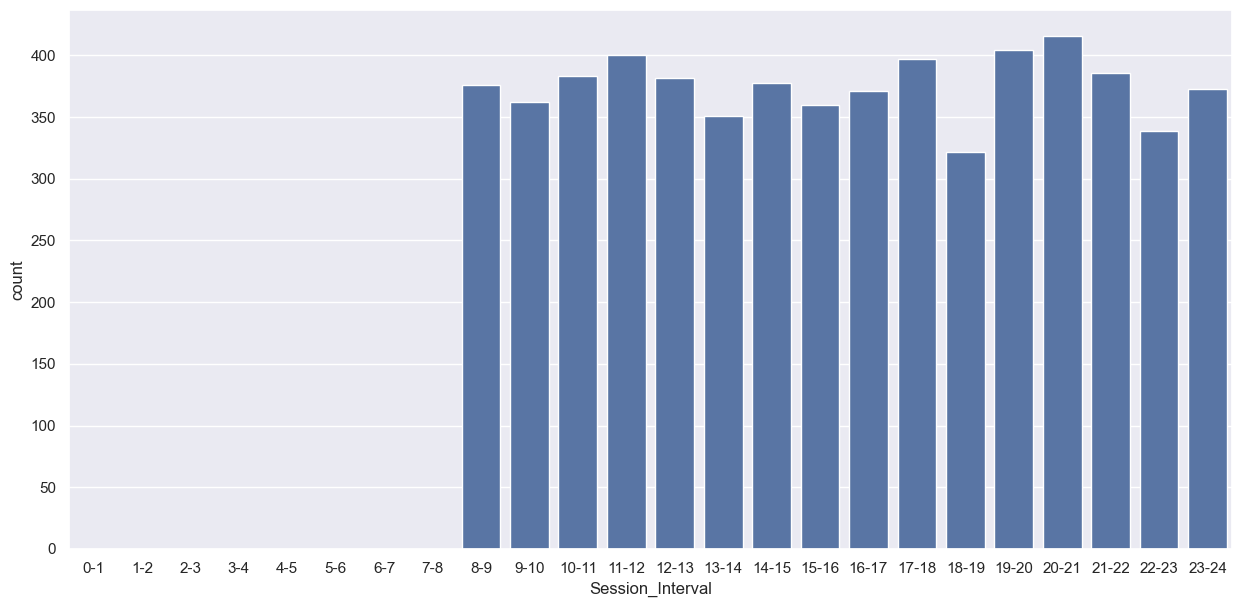

In [34]:
# Move toward the quetsion 
plt.figure(figsize = (15,7))
sns.countplot(df,x = "Session_Interval")

### 🕒 Most Active Gaming Hours

- Players are inactive before **8 AM**.
- Peak session start: **8–9 PM (20–21)**.
- High activity spans **8 AM to midnight**.

**Insight:**  
Focus events & offers in the evening.  
Use early mornings for maintenance.


Q5. 🌍 **Which Indian studio region has the highest average gameplay time?**  

In [35]:
df.head()

,Player_ID,Age,Country,Studio_Region,Game_Title,Genre,Game_Mode,Platform,Device_Type,Sales_Channel,Game_Release_Year,Join_Date,Last_Login,Session_Start_Time,Session_End_Time,Daily_Playtime (mins),In_Game_Purchases ($),Membership_Tier,Favorite_Mode,Support_Tickets_Raised,Refund_Requested,Marketing_Source,Churned,Session_Start_Hour,Session_Interval
0,P1000,20,India,Kolkata,FIFA 24,Battle Royale,Battle Royale,PC,Switch,Steam,2019,2023-09-25,2023-10-27,08:05:00,09:15:00,70.0,46.53,Free,Solo,2,No,In-Game Promo,Yes,8,8-9
1,P1001,39,USA,Delhi,PUBG,Battle Royale,Zombies,PC,Switch,Company Website,2023,2022-02-12,2022-12-27,14:48:00,16:29:00,101.0,20.44,Free,Team,1,No,Ads,Yes,14,14-15
2,P1002,42,Brazil,Bangalore,Apex Legends,FPS,Ranked,Console,Switch,App Store,2021,2019-10-12,2020-04-16,15:49:00,17:18:00,89.0,197.04,VIP,Team,0,No,YouTube,Yes,15,15-16
3,P1003,23,UK,Pune,Fortnite,Strategy,Solo,Mobile,Switch,Steam,2020,2021-09-29,2022-08-29,22:24:00,23:48:00,84.0,197.90,Free,Team,2,No,Ads,Yes,22,22-23
4,P1004,27,India,Pune,Apex Legends,Sports,Zombies,PC,Android Tablet,App Store,2021,2024-08-06,2025-02-24,22:09:00,23:31:00,82.0,27.93,Premium,Team,1,No,In-Game Promo,Yes,22,22-23


In [36]:
# Table which contains only India Data
df_India = df[df["Country"] == "India"]
# Group by on studio_region 
df_India.groupby("Studio_Region").agg({"Daily_Playtime (mins)":"mean"}
                                     ).round(2).sort_values(by = "Daily_Playtime (mins)",ascending = False).head(1)

C:\Users\nikuj\AppData\Local\Temp\ipykernel_4624\3514467908.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_India.groupby("Studio_Region").agg({"Daily_Playtime (mins)":"mean"}


,Daily_Playtime (mins)
Studio_Region,
Bangalore,99.51


### 🏢 Top Performing Studio Region in India

Among Indian players, **Bangalore-based studio** leads with the highest average daily playtime of **~99.5 minutes**.

🧠 Insight:
> Players are most engaged with games developed by Bangalore studios — signaling strong product quality or genre alignment.


Q6. 📉 **Is there a relationship between churned players and support tickets raised?**  

In [37]:
summ = df.groupby("Churned").agg({"Support_Tickets_Raised":"sum"})
meann = df.groupby("Churned").agg({"Support_Tickets_Raised":"mean"})
print(summ)
print(meann)

         Support_Tickets_Raised
Churned                        
No                          416
Yes                        5442
         Support_Tickets_Raised
Churned                        
No                     0.992840
Yes                    0.975094


C:\Users\nikuj\AppData\Local\Temp\ipykernel_4624\1416065630.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summ = df.groupby("Churned").agg({"Support_Tickets_Raised":"sum"})
C:\Users\nikuj\AppData\Local\Temp\ipykernel_4624\1416065630.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  meann = df.groupby("Churned").agg({"Support_Tickets_Raised":"mean"})


<Axes: xlabel='Churned', ylabel='Support_Tickets_Raised'>

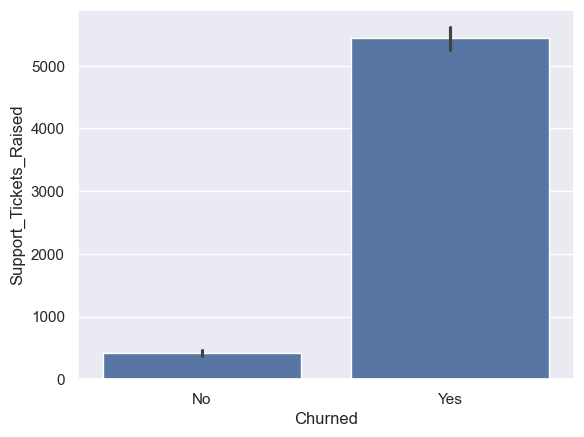

In [38]:
sns.barplot(data = df,x = "Churned",y = "Support_Tickets_Raised",estimator = np.sum)

<Axes: xlabel='Churned', ylabel='Support_Tickets_Raised'>

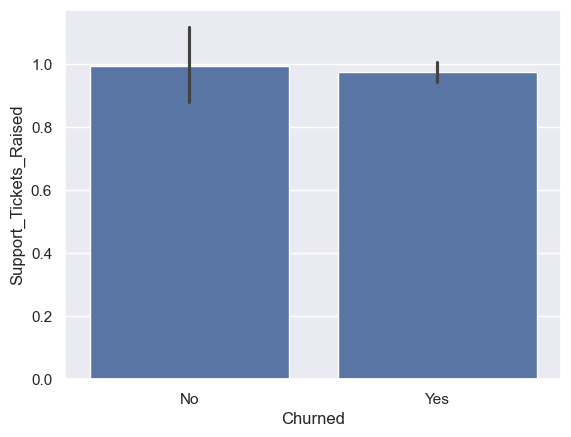

In [39]:
sns.barplot(data = df,x = "Churned",y = "Support_Tickets_Raised",estimator = np.mean)

- Players who **churned** raised a **significantly higher total number of support tickets** compared to those who did not churn.
- However, the **average number of tickets per player** is nearly the **same** for both churned and non-churned groups.
- 🔍 **Interpretation**:
  - The **volume of churned players** is higher, which increases the **total ticket count**.
  - But on an individual level, **each player** (churned or not) tends to raise a similar number of tickets.
- 🧠 **Business Insight**:
  - Support issues are widespread across all users, but churned users make up a larger group.
  - Focus should be on improving overall support experience to reduce churn risk.


Q7. 🔁 **Which game titles have the highest retention (based on last login activity)?**  

In [40]:
df.head()

,Player_ID,Age,Country,Studio_Region,Game_Title,Genre,Game_Mode,Platform,Device_Type,Sales_Channel,Game_Release_Year,Join_Date,Last_Login,Session_Start_Time,Session_End_Time,Daily_Playtime (mins),In_Game_Purchases ($),Membership_Tier,Favorite_Mode,Support_Tickets_Raised,Refund_Requested,Marketing_Source,Churned,Session_Start_Hour,Session_Interval
0,P1000,20,India,Kolkata,FIFA 24,Battle Royale,Battle Royale,PC,Switch,Steam,2019,2023-09-25,2023-10-27,08:05:00,09:15:00,70.0,46.53,Free,Solo,2,No,In-Game Promo,Yes,8,8-9
1,P1001,39,USA,Delhi,PUBG,Battle Royale,Zombies,PC,Switch,Company Website,2023,2022-02-12,2022-12-27,14:48:00,16:29:00,101.0,20.44,Free,Team,1,No,Ads,Yes,14,14-15
2,P1002,42,Brazil,Bangalore,Apex Legends,FPS,Ranked,Console,Switch,App Store,2021,2019-10-12,2020-04-16,15:49:00,17:18:00,89.0,197.04,VIP,Team,0,No,YouTube,Yes,15,15-16
3,P1003,23,UK,Pune,Fortnite,Strategy,Solo,Mobile,Switch,Steam,2020,2021-09-29,2022-08-29,22:24:00,23:48:00,84.0,197.90,Free,Team,2,No,Ads,Yes,22,22-23
4,P1004,27,India,Pune,Apex Legends,Sports,Zombies,PC,Android Tablet,App Store,2021,2024-08-06,2025-02-24,22:09:00,23:31:00,82.0,27.93,Premium,Team,1,No,In-Game Promo,Yes,22,22-23


In [41]:
df["Last_Login"].max()

Timestamp('2025-06-30 00:00:00')

<Axes: xlabel='Game_Title'>

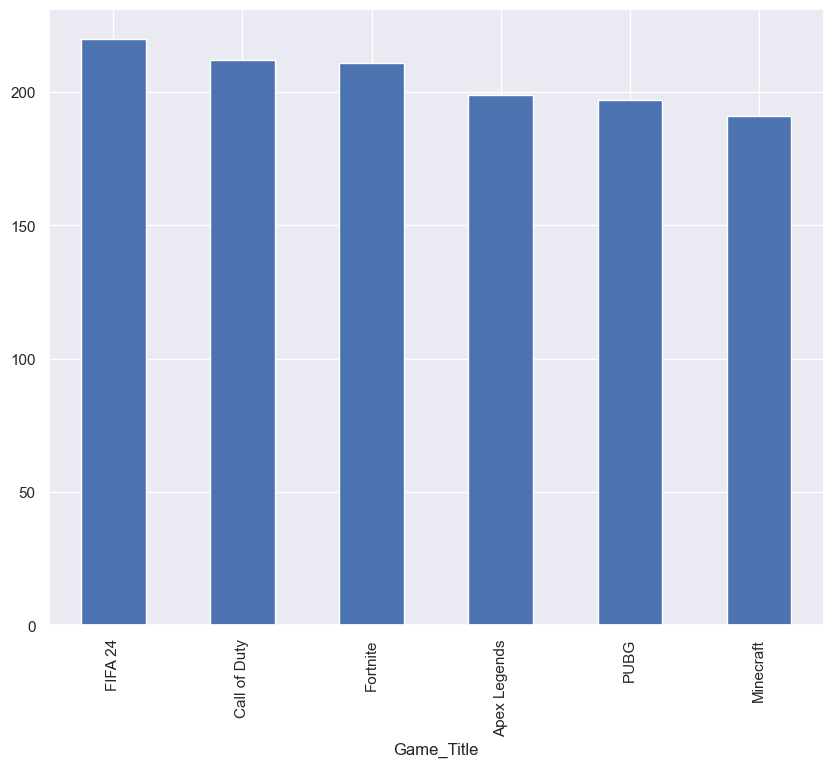

In [42]:
# Filtering the data for Last Login > '2024-12-31'
df_newest_login = df[df["Last_Login"]> '2024-12-31']

# Observing how they distributed :-
df_newest_login["Game_Title"].value_counts().plot(kind = "bar",figsize = (10,8))

### 🔑 Key Insights from Game Title Distribution (Post-31 Dec 2024)

- **FIFA 24** leads as the most played game among recently active users, indicating strong user retention or popularity.
- **Call of Duty** and **Fortnite** closely follow, showing continued dominance of competitive shooter genres.
- **Minecraft**, while still popular, has relatively lower engagement in recent logins—may suggest a dip in active playtime or seasonal trends.
- Overall, competitive and sports titles are maintaining **higher player activity**, suggesting they’re more effective at keeping users engaged.


In [43]:
df.head()

,Player_ID,Age,Country,Studio_Region,Game_Title,Genre,Game_Mode,Platform,Device_Type,Sales_Channel,Game_Release_Year,Join_Date,Last_Login,Session_Start_Time,Session_End_Time,Daily_Playtime (mins),In_Game_Purchases ($),Membership_Tier,Favorite_Mode,Support_Tickets_Raised,Refund_Requested,Marketing_Source,Churned,Session_Start_Hour,Session_Interval
0,P1000,20,India,Kolkata,FIFA 24,Battle Royale,Battle Royale,PC,Switch,Steam,2019,2023-09-25,2023-10-27,08:05:00,09:15:00,70.0,46.53,Free,Solo,2,No,In-Game Promo,Yes,8,8-9
1,P1001,39,USA,Delhi,PUBG,Battle Royale,Zombies,PC,Switch,Company Website,2023,2022-02-12,2022-12-27,14:48:00,16:29:00,101.0,20.44,Free,Team,1,No,Ads,Yes,14,14-15
2,P1002,42,Brazil,Bangalore,Apex Legends,FPS,Ranked,Console,Switch,App Store,2021,2019-10-12,2020-04-16,15:49:00,17:18:00,89.0,197.04,VIP,Team,0,No,YouTube,Yes,15,15-16
3,P1003,23,UK,Pune,Fortnite,Strategy,Solo,Mobile,Switch,Steam,2020,2021-09-29,2022-08-29,22:24:00,23:48:00,84.0,197.90,Free,Team,2,No,Ads,Yes,22,22-23
4,P1004,27,India,Pune,Apex Legends,Sports,Zombies,PC,Android Tablet,App Store,2021,2024-08-06,2025-02-24,22:09:00,23:31:00,82.0,27.93,Premium,Team,1,No,In-Game Promo,Yes,22,22-23


In [45]:
df.columns

Index(['Player_ID', 'Age', 'Country', 'Studio_Region', 'Game_Title', 'Genre',
       'Game_Mode', 'Platform', 'Device_Type', 'Sales_Channel',
       'Game_Release_Year', 'Join_Date', 'Last_Login', 'Session_Start_Time',
       'Session_End_Time', 'Daily_Playtime (mins)', 'In_Game_Purchases ($)',
       'Membership_Tier', 'Favorite_Mode', 'Support_Tickets_Raised',
       'Refund_Requested', 'Marketing_Source', 'Churned', 'Session_Start_Hour',
       'Session_Interval'],
      dtype='object')

In [46]:
df.to_csv("Gaming_Data_Cleaned.csv",index = False)

In [1]:
# Thanks For visiting 🫠🫠